# Cinétique enzymatique : Modèle de Michaelis Menten

On peut démontrer que la vitesse de production du produit P par réaction catalytique du substrat S avec l'enzyme E s'écrit :
$$v=\frac{d[P]}{dt}=\frac{v_{max}[S]_0}{[S]_0+K_m}$$

Les lignes de code ci-dessous permettent de tracer la vitesse de réaction en fonction de la concentration en substrat.

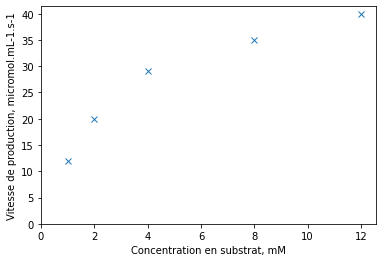

In [19]:
import numpy as np
import matplotlib.pyplot as plt
S0=np.array([1,2,4,8,12])
v=np.array([12,20,29,35,40])

plt.plot(S0,v,'x')
plt.xlabel('Concentration en substrat, mM')
plt.ylabel('Vitesse de production, micromol.mL-1.s-1')
plt.xlim(0,)
plt.ylim(0,)
plt.show()

Il est difficile de déduire de ce graphe les paramètres de la réaction $v_{max}$ et $K_m$.

Pour trouver facilement les paramètres, on peut linéariser cette équation en traçant $\frac{1}{v}$ en fonction de $\frac{1}{[S]_0}$ :
$$\frac{1}{v}=\frac{K_m}{v_{max}}* \frac{1}{[S]_0}+\frac{1}{v_{max}}$$
Le code ci-dessous permet de réaliser la régression linéaire et de déterminer les paramètres de la réaction.

vmax est egal à :  51.21  micromol.mL-1.s-1
Km est egal à :  3.237  mM


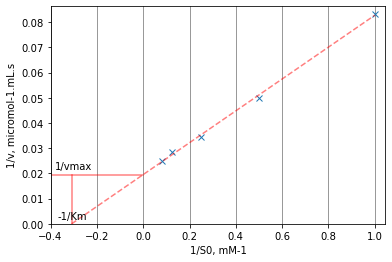

In [65]:
from scipy import stats

unsurS0=1/S0
unsurv=1/v

plt.plot(unsurS0,unsurv,'x')
plt.xlabel('1/S0, mM-1')
plt.ylabel('1/v, micromol-1.mL.s')
plt.xlim(-0.4,)
plt.ylim(0,)

res = stats.linregress(unsurS0, unsurv)
vmax=1/res.intercept
Km=res.slope*vmax
print ('vmax est egal à : ',round(vmax,2), ' micromol.mL-1.s-1' )
print ('Km est egal à : ',round(Km,3), ' mM')

xplot=np.linspace(-1/Km, 1, 100)
plt.plot(xplot, res.intercept + res.slope*xplot, 'r--', label='regression linéaire',alpha=0.5)
plt.grid(axis='x', color='0.5')
plt.plot([-1/Km, -1/Km],[0, 1/vmax],'r',alpha=0.5)
plt.plot([-0.4, 0],[1/vmax,1/vmax],'r',alpha=0.5)
plt.text(-1.2/Km, 0.002,'-1/Km')
plt.text(-0.38, 1/vmax+0.002,'1/vmax')

plt.show()

Le code ci-dessous permet de vérifier comment les résultats de la réaction enzymatique peuvent être modélisés par les paramètres de la réaction.

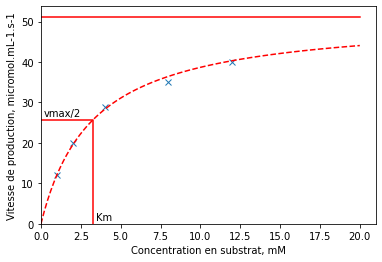

In [31]:
smax=20
splot=np.linspace(0,smax,100)
vplot=vmax*splot/(Km+splot)

plt.plot(S0,v,'x')
plt.plot(splot,vplot,'r--')
plt.plot([0, smax],[vmax,vmax],'r')
plt.plot([0, Km,Km],[vmax/2,vmax/2,0],'r')
plt.text(0+0.2, vmax/2+1, 'vmax/2')
plt.text(Km+0.2, 1, 'Km')
plt.xlabel('Concentration en substrat, mM')
plt.ylabel('Vitesse de production, micromol.mL-1.s-1')
plt.xlim(0,)
plt.ylim(0,)
plt.show()